**BT : Điều khiển con lắc đơn trên xe**
- Giả sử chiều dương xe chạy là trái -> phải
- Chiều dương anpha con lắc so vs phương thẳng đứng là theo chiều kim đồng hồ
- Chiều dương d(anpha) là ngược chiều kim đồng hồ

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c31f1b1e2c43a751da6b4821c9968fe5d503ff60b69685b0d43bd5f6bc33d475
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.controlsystem import Antecedent
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection

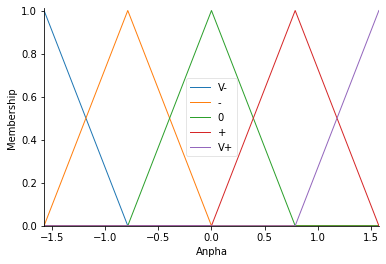

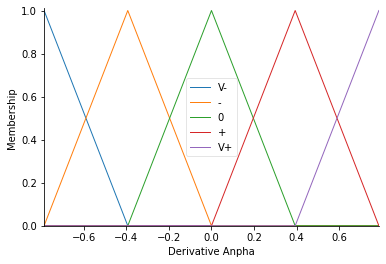

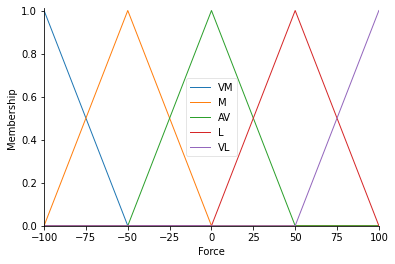

In [ ]:
universe1 = np.linspace(-np.pi/2, np.pi/2, 61)
universe2 = np.linspace(-np.pi/4, np.pi/4, 61)
universe3 = np.linspace(-100,100,61)

#input
ap    = ctrl.Antecedent(universe1, 'Anpha') #anpha
dap   = ctrl.Antecedent(universe2, 'Derivative Anpha') #đạo hàm anpha
#output
force = ctrl.Consequent(universe3, 'Force') #lực đẩy F

#name
names_ap_dap = ['V-', '-', '0', '+', 'V+']
names_force  = ['VM', 'M', 'AV', 'L', 'VL']

#.automf
ap.automf(names = names_ap_dap)
dap.automf(names = names_ap_dap)
force.automf(names = names_force)

#view
ap.view()
dap.view()
force.view()

In [ ]:
#rule
rule = []
rule.append(ctrl.Rule(antecedent=(ap['V-'] & dap['V-'])|(ap['0'] & dap['V-'])|(ap['+'] & dap['V-'])|(ap['V+'] & dap['V-'])|
(ap['V+'] & dap['0']), consequent=force['VM'], label='Rule VM'))

rule.append(ctrl.Rule(antecedent=(ap['-'] & dap['V-'])|(ap['V-'] & dap['-'])|(ap['-'] & dap['-'])|(ap['0'] & dap['-'])|
(ap['+'] & dap['-'])|(ap['V+'] & dap['-']), consequent=force['M'], label='Rule M'))

rule.append(ctrl.Rule(antecedent=(ap['V-'] & dap['0'])|(ap['-'] & dap['0'])|(ap['0'] & dap['0'])|(ap['+'] & dap['0'])|
(ap['-'] & dap['+']), consequent=force['AV'], label='Rule AV'))

rule.append(ctrl.Rule(antecedent=(ap['V-'] & dap['+'])|(ap['0'] & dap['+'])|(ap['+'] & dap['+'])|(ap['V+'] & dap['+']), consequent=force['L'], label='Rule L'))

rule.append(ctrl.Rule(antecedent=(ap['V-'] & dap['V+'])|(ap['-'] & dap['V+'])|(ap['0'] & dap['V+'])|(ap['+'] & dap['V+'])|
(ap['V+'] & dap['V+']), consequent=force['VL'], label='Rule VL'))

In [ ]:
#control
Force_system = ctrl.ControlSystem(rule)
Force_simulation = ctrl.ControlSystemSimulation(Force_system,flush_after_run = 61*61+1)

upsampled1 = np.linspace(-np.pi/2, np.pi/2, 61)
upsampled2 = np.linspace(-np.pi/4, np.pi/4, 61)

x,y = np.meshgrid(upsampled1, upsampled2)
z   = np.zeros_like(x)
for i in range(61) :
  for j in range(61) :
    Force_simulation.input['Anpha'] = x[i,j]
    Force_simulation.input['Derivative Anpha'] = y[i,j]
    Force_simulation.compute()
    z[i,j] = Force_simulation.output['Force']

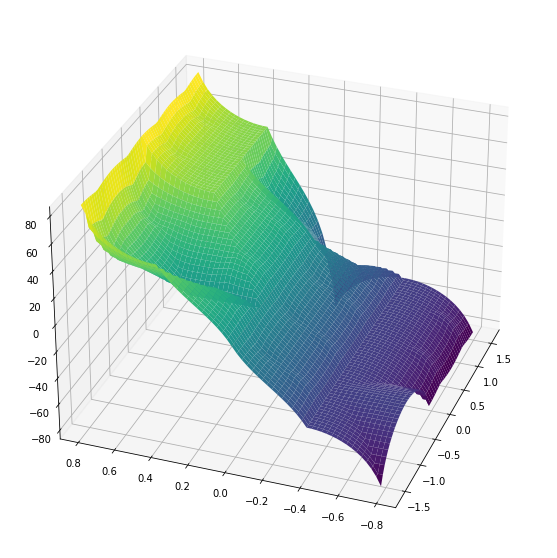

In [ ]:
#Xuất đồ thị
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.5, antialiased = True)
#cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
#cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
#cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)